In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(42)

full_data = pd.read_csv('coffee_dataset.csv')

`1.` In this case, imagine we are interested in testing if the mean height of all individuals in `full_data` is equal to 67.60 inches or **different** than 67.60.  First, use **quiz 1** below to state the null and alternative hypotheses for these cases in the cell below. 

$$H_0: \mu = 67.6\\
H_1: \mu \neq 67.6$$

`2.` Find:
* What is the population mean height?  
* What is the standard deviation of the population heights?  Create a sample set of data using the code below.  
* What is the sample mean height?  Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram. 
* What is the standard deviation of the sampling distribution of the mean of five draws?

Use **quiz 2** below to assure your answers are correct.  

In [81]:
pop_mean = full_data['height'].mean()
pop_mean

67.59748697307937

In [82]:
pop_std = full_data['height'].std()
pop_std

3.119433206550344

In [83]:
means = []
sample1 = full_data.sample(5)
for _ in range(10000):
    sample = sample1.sample(5, replace = True)
    means.append(sample['height'].mean())

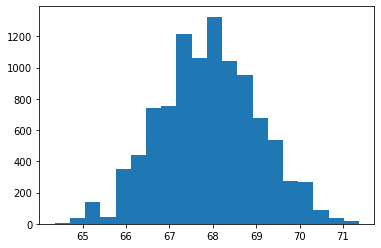

In [84]:
plt.hist(means, 20);

In [85]:
means_std = np.std(means)
means_std

1.141357351999374

`3.` Using the null and alternative hypotheses set up in question 1 and the results of your sampling distribution in question 2, simulate the mean values you would expect from the null hypothesis.  Use these simulated values to determine a p-value to make a decision about your null and alternative hypotheses.  Check your solution using **quiz 3** and **quiz 4** below.

**Hint:** Use the numpy documentation [here](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.normal.html) to assist with your solution.

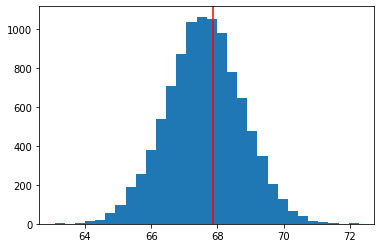

In [86]:
null_mean = 67.6
pseudo_means = np.random.normal(null_mean, means_std, 10000)
plt.hist(pseudo_means, 30);
plt.axvline(x=sample1.height.mean(), color = 'red'); # where our sample mean falls on null dist

In [87]:
# for a two sided hypothesis, we want to look at anything 
# more extreme from the null in both directions
obs_mean = sample1.height.mean()
obs_mean


67.88234252049084

In [88]:
# wahrscheinlichkeit, dass eine pseudostichprobe größer ist als die gemachte stichprobe
prob_more_extreme_high = (pseudo_means > obs_mean).mean()
prob_more_extreme_high

0.4071

In [89]:
# probability a statistic is more extreme lower
prob_more_extreme_low = (pseudo_means - (obs_mean - null_mean) < pseudo_means).mean()
prob_more_extreme_low

1.0

In [90]:
pval = prob_more_extreme_low + prob_more_extreme_high
pval

1.4071

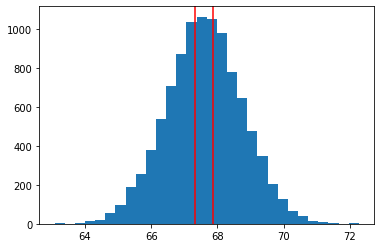

In [91]:
upper_bound = obs_mean
lower_bound = null_mean - (obs_mean - null_mean)

plt.hist(pseudo_means, 30);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist

In [92]:
print(upper_bound, lower_bound)

67.88234252049084 67.31765747950915


`4.` Now imagine if you received the same sample mean as you calculated from the sample in question 1 above, but that you actually retrieved it from a sample of 300.  What would the new standard deviation be for your sampling distribution for the mean of 300 values?  Additionally, what would your new p-value be for choosing between the null and alternative hypotheses you set up? Simulate the sampling distribution for the mean of five values to see the shape and plot a histogram.  Use your solutions here to answer the second to last quiz question below.

**Hint:**  If you get stuck, notice you can use the solution from quiz regarding finding the p-value earlier to assist with obtaining this answer with just a few small changes.

In [93]:
means = []
sample2 = full_data.sample(300)
for _ in range(10000):
    sample = sample2.sample(300, replace = True)
    means.append(sample['height'].mean())

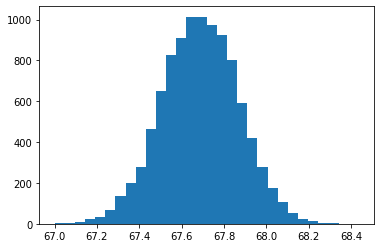

In [94]:
plt.hist(means, 30);

In [95]:
means_std = np.std(means)
means_std

0.18108485974118946

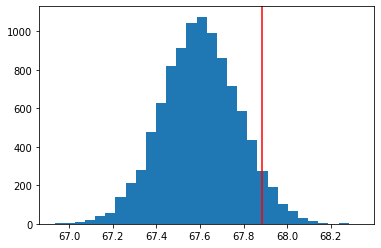

In [96]:
null_mean = 67.6
obs_mean = sample1.height.mean()

pseudo_means = np.random.normal(null_mean, means_std, 10000)
plt.hist(pseudo_means, 30);
plt.axvline(x=obs_mean, color = 'red'); # where our sample mean falls on null dist

For a two sided hypothesis, we want to look at anything more extreme from the null in both directions

In [97]:
# wahrscheinlichkeit, dass eine pseudostichprobe größer ist als die gemachte stichprobe
prob_more_extreme_high = (pseudo_means > obs_mean).mean() # Ich hätte vermutlich len() genommen...
prob_more_extreme_high

0.056

In [98]:
# probability a statistic is more extreme lower
prob_more_extreme_low = np.array((obs_mean + null_mean) < 0).mean()
prob_more_extreme_low = np.array(null_mean < obs_mean).mean()
prob_more_extreme_low

1.0

In [99]:
pval = prob_more_extreme_low + prob_more_extreme_high
pval

1.056

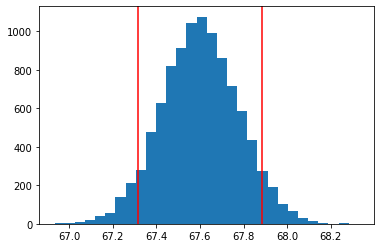

In [100]:
upper_bound = obs_mean
lower_bound = 2*null_mean - obs_mean # In direction of Observation Mean!

plt.hist(pseudo_means, 30);
plt.axvline(x=lower_bound, color = 'red'); # where our sample mean falls on null dist
plt.axvline(x=upper_bound, color = 'red'); # where our sample mean falls on null dist